# Capital Asset Pricing Model (CAPM)

The capital asset pricing model is one of the most foundational models in finance. The idea of this model is to capture the expected returns of stocks based on three pieces of information: the stock beta, the market return and the risk-free rate. It has two main ideas behind it: Higher risk (higher beta) stocks should provide proportionally more return, and the only risk that should be captured is the market risk because all other risk can be diversified away. 

Let's consider two end points, a stock with a beta of 0 and one with beta of 1. The stock with a beta of 0 should provide just the risk-free rate because there is hypothetically no (market) risk. The stock with a beta of 1 should return the same as the market because it has the same (market) risk. All other expected returns can be found through fitting a line between these two points. Fitting a line between these two points yields the following equation:

$$ E(R_i) = r_f + \beta_i (r_m - r_f) $$

where

$ E(R_i) = \text{The expected return of stock i} $$

$ r_f = \text{The risk-free rate} $

$ r_m = \text{The return of the market} $

$ \beta_i = \text{The beta of stock i} $

Also, the term $r_m - r_f$ is often called the market risk premium. It is the return that we expect from the market in excess of the risk-free rate.

What do we expect a stock to return with a beta of 0, a risk-free rate of 2% and market returns of 8%?

In [1]:
#Inputs
Rf = .02
Rm = .08
beta = 0

#Find the market risk premium
mrp = Rm-Rf

#Use the CAPM equation
print(Rf + mrp * beta)

0.02


We get back just the risk-free rate as expected. What about beta of 1?

In [2]:
#Inputs
Rf = .02
Rm = .08
beta = 1

#Find the market risk premium
mrp = Rm-Rf

#Use the CAPM equation
print(Rf + mrp * beta)

0.08


In this case we get back the market return. Finally, what about a beta of .5?

In [3]:
#Inputs
Rf = .02
Rm = .08
beta = .5

#Find the market risk premium
mrp = Rm-Rf

#Use the CAPM equation
print(Rf + mrp * beta)

0.05


Now we get something in the middle of the two points, as the beta is in the middle of the two. We can use numpy's arange function to build out the betas between 0 and 2 then find the CAPM estimate for all. With a numpy array we can apply mathematical functions directly to it.

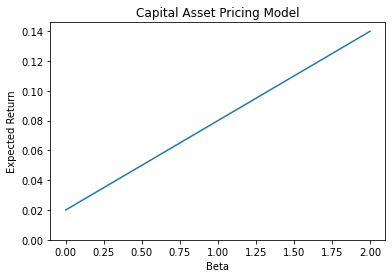

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Inputs
Rf = .02
Rm = .08

#Find the market risk premium
mrp = Rm-Rf

#Get the range of betas
betas = np.arange(0,2.1,.1)

#Find expected returns
expected_returns = Rf + mrp * betas

#Plot the CAPM equation
plt.plot(betas, expected_returns)
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.show()

## Comparing CAPM

Let's build a function for comparison of CAPM expected returns so that we can see how the parameters in each impact the returns. Then we can compare a scenario with a risk-free rate of 2%, market return of 8% to one with a risk-free rate of 2%, market return of 10%.

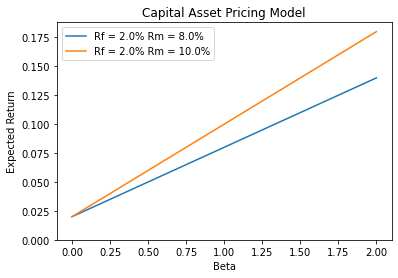

In [5]:
def compare_CAPM(Rf1, Rf2, Rm1, Rm2):
    #Get a range of betas
    betas = np.arange(0,2.1,.1)
    
    #Find the market risk premium
    mrp1 = Rm1-Rf1
    mrp2 = Rm2-Rf2
    
    #Find expected returns
    expected_returns1 = Rf1 + mrp1 * betas
    expected_returns2 = Rf2 + mrp2 * betas
    
    #Plot the CAPM equation
    label1 = "Rf = "+str(Rf1*100)+"%"+" Rm = "+str(Rm1*100)+"%"
    label2 = "Rf = "+str(Rf2*100)+"%"+" Rm = "+str(Rm2*100)+"%"
    plt.plot(betas, expected_returns1, label=label1)
    plt.plot(betas, expected_returns2, label=label2)
    plt.xlabel("Beta")
    plt.ylabel("Expected Return")
    plt.title("Capital Asset Pricing Model")
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    plt.legend()
    plt.show()
compare_CAPM(.02, .02, .08, .10)

When comparing these two graphs, we see how given the same risk-free (starting point for 0 beta) but a higher risk-premium, there is a larger slope. This is because the slope of the line will be equal to the risk-premium! It makes sense that the second line is steeper because of this. In the second scenario, there is a bigger reward for taking on market risk as the expected market risk premium is much higher. What about the case where the market return is 8% in both but the risk-free is 2% in the first scenario and 4% in the second?

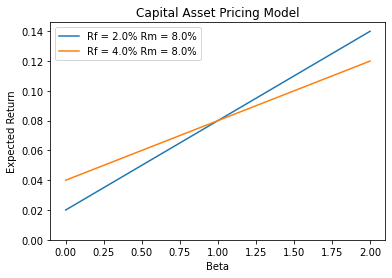

In [6]:
compare_CAPM(.02, .04, .08, .08)

We see the intersection of the two lines at beta 1, where we get just the market return, but after that we see the effect that the market risk premium has on the lines. For beta < 1, the second scenario leads to larger returns because the slope is lower, but when looking at beta > 1, the rewards are higher for the first scenario due to the larger slope. As a final example, what about 2%/8% compared to 4%/10%?

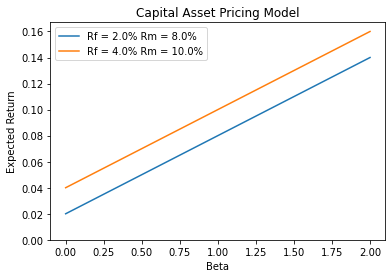

In [7]:
compare_CAPM(.02, .04, .08, .1)

In this case we are looking at a parallel shift since the market risk premium is the same in both cases but there are different starting points for the line.

## Expected Stock Returns

Given this line, we can expect certain returns along the line given a stock's beta. Let's start with beta of 1.5 and .5. What are the expected returns when the risk-free rate is 2% and the market return is 8%?

In [8]:
#Inputs
Rf = .02
Rm = .08
beta1 = 1.5
beta2 = .5

#Find the market risk premium
mrp = Rm-Rf

#Find the rates
r1 = Rf + mrp * beta1
r2 = Rf + mrp * beta2

print(r1)
print(r2)

0.11
0.05


Now plot these stocks on the CAPM curve.

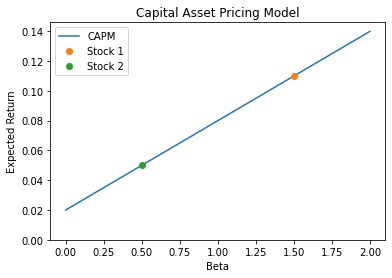

In [9]:
#Get the range of betas
betas = np.arange(0,2.1,.1)

#Find expected returns for the equation
expected_returns = Rf + mrp * betas

#Plot the CAPM equation
plt.plot(betas, expected_returns, label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.plot(beta1,r1,"o",label="Stock 1")
plt.plot(beta2,r2,"o",label="Stock 2")
plt.legend()
plt.show()

## Portfolio Beta

For a portfolio of stocks, the beta is going to come out to be just the weighted average of the betas within the portfolio. For those of you who prefer to see it in terms of math, the equation is:

$$ \beta_p = \sum_{i=1}^N w_i \beta_i$$

where

$$ \beta_p = \text{Portfolio beta} $$

$$ w_i = \text{Weight in asset i} $$

$$ \beta_i = \text{Beta of asset i} $$

If we are working with weights of .5 and .5, then we can quite easily find the return of the portfolio and the beta of the portfolio which will match that of the market return.

In [10]:
#Set the weights
w1 = .5
w2 = .5

#Find portfolio beta
beta_p = w1 * beta1 + w2 * beta2

#Find the portfolio return
rP = w1 * r1 + w2 * r2

print("Portfolio Beta: {}".format(beta_p))
print("Portfolio Return: {}".format(rP))

Portfolio Beta: 1.0
Portfolio Return: 0.08


Going back to our graphing, we will see that the portfolio return and beta are still on the line.

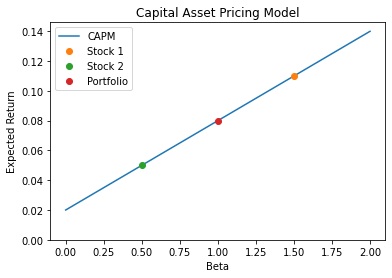

In [11]:
#Plot the CAPM equation
plt.plot(betas, expected_returns, label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.plot(beta1,r1,"o",label="Stock 1")
plt.plot(beta2,r2,"o",label="Stock 2")
plt.plot(beta_p,rP,"o",label="Portfolio")
plt.legend()
plt.show()

What we will see if we investigate having the weights vary from 0%/100% to 100%/0% is that the return is going to be a linear function and it will essentially just be a piece of the graph above between the two betas. Let's try it out.

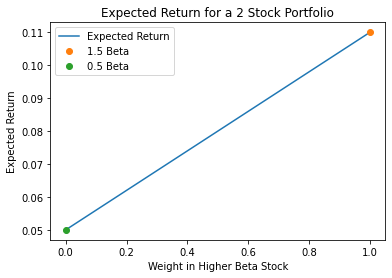

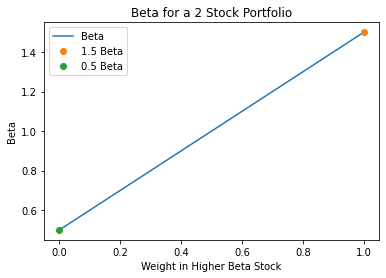

In [12]:
#Set the weight range for w1
w1 = np.linspace(0, 1, 21)

#The weight on the second is 1-w1
w2 = 1 - w1

#Find the beta
betas = w1 * beta1 + w2 * beta2

#Find the return
rP = w1 * r1 + w2 * r2

#Graph the return
plt.plot(w1, rP, label="Expected Return")
plt.xlabel("Weight in Higher Beta Stock")
plt.ylabel("Expected Return")
plt.title("Expected Return for a 2 Stock Portfolio")

plt.plot(1,r1,"o",label="1.5 Beta")
plt.plot(0,r2,"o",label="0.5 Beta")
plt.legend()

plt.show()

#Graph the beta

plt.plot(w1, betas, label="Beta")
plt.xlabel("Weight in Higher Beta Stock")
plt.ylabel("Beta")
plt.title("Beta for a 2 Stock Portfolio")

plt.plot(1,beta1,"o",label="1.5 Beta")
plt.plot(0,beta2,"o",label="0.5 Beta")
plt.legend()

plt.show()

## Shorting a Stock

Let's begin with the basic idea of shorting a stock. Essentially you are going in the opposite direction of the returns. If the stock returns 1%, you lose 1%. If it loses 1%, you gain 1%. The way it works is that you in essense sell a share of stock that you do not actually own and when it comes time to unwind the position you need to buy the stock in the open market to close out the position. The return you get is not only the opposite of the stock return, as we will see. But first let's show an example.

CAPM can be used with negative betas so let's look at a scenario where a stock has a beta of 1, the market return is 8% and the risk-free rate is 2%. What would the negative of the expected stock return be and what would the CAPM predicted return be?

In [13]:
#Inputs
stock_return = .08
Rf = .02
Rm = .08
beta = 1

#market risk premium
mrp = Rm-Rf

#The weight is -1
w = -1

#Portfolio beta is w * beta
beta_portfolio = w * beta

#CAPM return is:
print(Rf + beta_portfolio * mrp)
#Negative of stock return is
print(-stock_return)

-0.039999999999999994
-0.08


What is the problem here? It has to do with how cash is taken care of. When we short, we actually are given money and we have to buy and return the stock later. So in this case if we shorted \\$100 worth of stock and had \\$100 to begin with, we now have \\$200 to invest in the risk-free rate. So we would be able to receive 2X the risk-free rate or 2% * 2 which would come out to be a 4% gain from the cash we hold. That is where the difference comes from. The example below will further emphasize this point if you do not get it yet.

In [14]:
#Inputs
Rf = .02
Rm = .08

#Find the market risk premium
mrp = Rm-Rf

#In terms of dollars we start with
initial = 100


#We have $200 now because we get $100 from shorting $100 worth of stock
cash = 100+100
print("Money to invest: "+str(cash))

#Return of the stock is -Rm
Rs = -Rm
stock_investment = initial
print("The return of the stock in $: {}".format(Rs*stock_investment))

#We invest all $200 in the risk free asset
Rf = .02
Rf_investment = cash
print("The return of the risk free asset in $: {}".format(Rf*Rf_investment))

#Put them together
print("The return of the two together in $: {}".format(Rs*stock_investment+Rf*Rf_investment))

#The percent return
print("The return of the two together in %: {}".format((Rs*stock_investment+Rf*Rf_investment) / initial))

Money to invest: 200
The return of the stock in $: -8.0
The return of the risk free asset in $: 4.0
The return of the two together in $: -4.0
The return of the two together in %: -0.04


So if it is the case that we are allowed to short stocks, and the capital asset pricing model still makes sense, then we can extend our CAPM graph from earlier to include short positions.

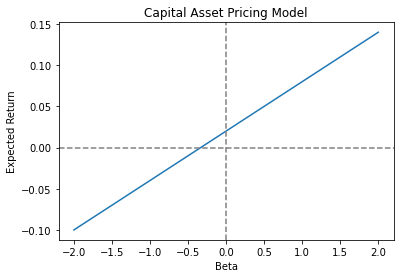

In [15]:
#Inputs
Rf = .02
Rm = .08

#Find the market risk premium
mrp = Rm-Rf

#Get the range of betas
betas = np.arange(-2,2.1,.1)

#Find expected returns
expected_returns = Rf + mrp * betas

#Plot the CAPM equation
plt.plot(betas, expected_returns)
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")

#Add a grid line around beta 0, and 0 return
plt.axhline(0, color='grey',linestyle="--")
plt.axvline(0, color='grey',linestyle="--")

plt.show()

## Alpha

Alpha is the term for deviations from CAPM. In reality CAPM is not at all a perfect measure, but for now we will make the assumption that it is a perfect measure. Now what if we have our usual set up, 8% market return, 2% risk-free rate but now a stock with a beta of 1 has an expected return of 10%? First of all, what does it look like on the graph?

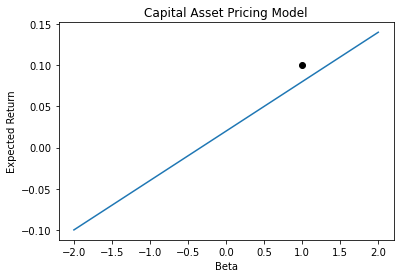

In [16]:
#Inputs
Rf = .02
Rm = .08

#Find the market risk premium
mrp = Rm-Rf

#Get the range of betas
betas = np.arange(-2, 2.1,.1)

#Find expected returns
expected_returns = Rf + mrp * betas

#Plot the CAPM equation
plt.plot(betas, expected_returns)
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
plt.plot(1,.1,"ko",label="Stock Return")
plt.show()

As you can see, he dot is actually off of the line. If we subtracted its return versus its expected return we would get the alpha.

In [17]:
alpha = .1 - (Rf + mrp * 1)
print(alpha)

0.020000000000000004


So in this specific case we see that the alpha is 2%. We can also ammend our graph to show how the alpha in terms of a line between expected by CAPM return and stock expected return. Alpha is equal to this vertical distance.

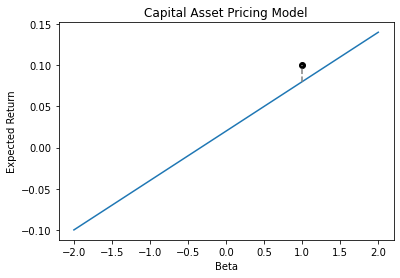

In [18]:
#Inputs
Rf = .02
Rm = .08

#Find the market risk premium
mrp = Rm-Rf

#Get the range of betas
betas = np.arange(-2, 2.1,.1)

#Find expected returns
expected_returns = Rf + mrp * betas

#Plot the CAPM equation
plt.plot(betas, expected_returns)
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")
plt.plot(1,.1,"ko",label="Stock Return")
plt.plot([1,1],[.08,.1],linestyle="--",color="grey",label="Alpha")
plt.show()

One way to use the alpha is to profit from it in a 0 beta scenario. What I mean by this is that if we have the alpha in a beta 1 stock, we can hedge the beta by going short another stock to let us capture just the alpha. 

In [19]:
#Inputs
stock_return = .10
market_return = .08
risk_free = .02
mrp = market_return - risk_free
beta_stock = 1
beta_market = 1
weight_stock = 1
weight_market = -1

#We can get portfolio beta by mixing
beta_portfolio = weight_stock * beta_stock - weight_market * weight_market

#We can also find the return
return_portfolio = stock_return * beta_stock + market_return * weight_market + risk_free

print("Portfolio beta: {}".format(beta_portfolio))
print("Portfolio return: {}".format(return_portfolio))

Portfolio beta: 0
Portfolio return: 0.04000000000000001


Below you can see how this alpha can be transferred to a 0 beta investment by hedging the market risk.

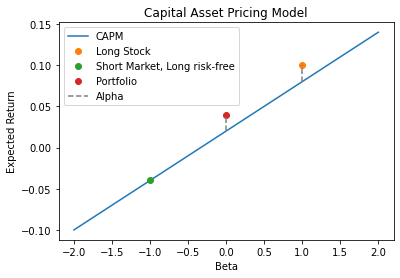

In [20]:
betas = np.arange(-2, 2.1,.1)
expected_returns = Rf + mrp * betas

plt.plot(betas, expected_returns, label="CAPM")
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Capital Asset Pricing Model")

plt.plot(1, stock_return, "o",label="Long Stock")
plt.plot(-1,Rf-mrp,"o",label="Short Market, Long risk-free")
plt.plot(beta_portfolio, return_portfolio, "o", label="Portfolio")

plt.plot([1,1],[.08,.1],linestyle="--",color="grey",label="Alpha")
plt.plot([0,0],[.02,.04],linestyle="--",color="grey")
plt.legend()

plt.show()